# Midjourney bot

copyright 2023, Denis Rothman

[Reference tutorial by Michael King on Medium](https://medium.com/@neonforge/how-to-create-a-discord-bot-to-download-midjourney-images-automatically-python-step-by-step-guide-3e76d3282871) modified and adapted for educational purposes in this notebook

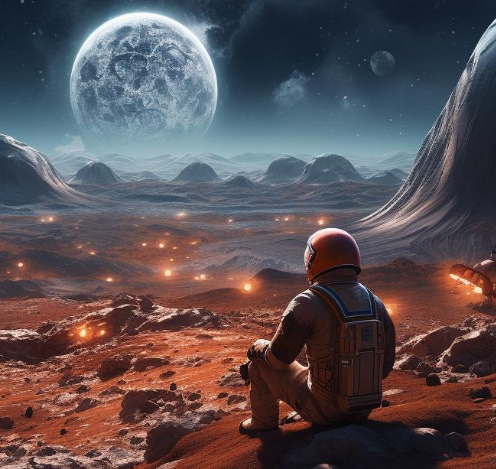

In [ ]:
!pip install discord.py python-dotenv Pillow requests

In [ ]:
#Discord token
#Store you key in a file and read it(you can type it directly in the notebook but it will be visible for somebody next to you)
from google.colab import drive
drive.mount('/content/drive')
f = open("drive/MyDrive/files/midjourney.txt", "r")
discord_token=f.readline()
f.close()

Mounted at /content/drive


In [ ]:
import discord
from discord.ext import commands
import requests
from dotenv import load_dotenv
from PIL import Image
import os

#discord_token = [YOUR_TOKEN]

In [ ]:
load_dotenv()
client = commands.Bot(command_prefix="*", intents=discord.Intents.all())
directory = os.getcwd()
print(directory)

def split_image(image_file):
    with Image.open(image_file) as im:
        # Get the width and height of the original image
        width, height = im.size
        # Calculate the middle points along the horizontal and vertical axes
        mid_x = width // 2
        mid_y = height // 2
        # Split the image into four equal parts
        top_left = im.crop((0, 0, mid_x, mid_y))
        top_right = im.crop((mid_x, 0, width, mid_y))
        bottom_left = im.crop((0, mid_y, mid_x, height))
        bottom_right = im.crop((mid_x, mid_y, width, height))
        return top_left, top_right, bottom_left, bottom_right

async def download_image(url, filename):
    response = requests.get(url)
    if response.status_code == 200:

        # Define the input and output folder paths
        input_folder = "input"
        output_folder = "output"

        # Check if the output folder exists, and create it if necessary
        if not os.path.exists(output_folder):
            os.makedirs(output_folder)

        # Check if the input folder exists, and create it if necessary
        if not os.path.exists(input_folder):
            os.makedirs(input_folder)
        with open(f"{directory}/{input_folder}/{filename}", "wb") as f:
            f.write(response.content)
        print(f"Image downloaded: {filename}")
        input_file = os.path.join(input_folder, filename)

        if "UPSCALED_" not in filename:
            file_prefix = os.path.splitext(filename)[0]
            # Split the image
            top_left, top_right, bottom_left, bottom_right = split_image(input_file)
            # Save the output images with dynamic names in the output folder
            top_left.save(os.path.join(output_folder, file_prefix + "_top_left.jpg"))
            top_right.save(os.path.join(output_folder, file_prefix + "_top_right.jpg"))
            bottom_left.save(os.path.join(output_folder, file_prefix + "_bottom_left.jpg"))
            bottom_right.save(os.path.join(output_folder, file_prefix + "_bottom_right.jpg"))
        else:
            os.rename(f"{directory}/{input_folder}/{filename}", f"{directory}/{output_folder}/{filename}")
        # Delete the input file
        os.remove(f"{directory}/{input_folder}/{filename}")

@client.event
async def on_ready():
    print("Bot connected")

@client.event
async def on_message(message):
    print(message.content)
    channel_id = message.channel.id
    print(channel_id)
    for attachment in message.attachments:
        if "Upscaled by" in message.content:
            file_prefix = 'UPSCALED_'
        else:
            file_prefix = ''
        if attachment.filename.lower().endswith((".png", ".jpg", ".jpeg", ".gif")):
            await download_image(attachment.url, f"{file_prefix}{attachment.filename}")

    # use Discord message to download images from a channel history, example: "history:12"
    if message.content.startswith("history:"):
        download_qty = int(message.content.split(":")[1])
        channel = message.channel
        async for msg in channel.history(limit=download_qty):
            for attachment in msg.attachments:
                if "Upscaled by" in message.content:
                    file_prefix = 'UPSCALED_'
                else:
                    file_prefix = ''
                if attachment.filename.lower().endswith((".png", ".jpg", ".jpeg", ".gif")):
                    try:
                        await download_image(attachment.url, f"{file_prefix}{attachment.filename}")
                    except:
                        time.sleep(10)
                        continue
import nest_asyncio
nest_asyncio.apply()
client.run(discord_token)

2023-08-17 10:54:38 INFO     discord.client logging in using static token
INFO:discord.client:logging in using static token


/content


2023-08-17 10:54:39 INFO     discord.gateway Shard ID None has connected to Gateway (Session ID: 6851743717a7e92f7981cde80e5563d3).
INFO:discord.gateway:Shard ID None has connected to Gateway (Session ID: 6851743717a7e92f7981cde80e5563d3).


Bot connected
**in space between the Moon and Mars** - <@766711447420928040> (Waiting to start)
1104811736269328427
**in space between the Moon and Mars** - <@766711447420928040> (fast)
1104811736269328427
Image downloaded: ai2xai_in_space_between_the_Moon_and_Mars_4f4d2edf-a968-46bd-bd51-4414847577e1.png
**In the distance, a solitary ship glides smoothly down the highway in the Arizona desert.** - <@766711447420928040> (Waiting to start)
1104811736269328427
**In the distance, a solitary ship glides smoothly down the highway in the Arizona desert.** - <@766711447420928040> (fast)
1104811736269328427
Image downloaded: ai2xai_In_the_distance_a_solitary_ship_glides_smoothly_down_the_8f3b1d6b-6134-475f-be0e-2f76a2d39c8a.png
**In the distance, a 19th century fantastic ship glides smoothly down the highway in the Arizona desert.** - <@766711447420928040> (Waiting to start)
1104811736269328427
**In the distance, a 19th century fantastic ship glides smoothly down the highway in the Arizona des

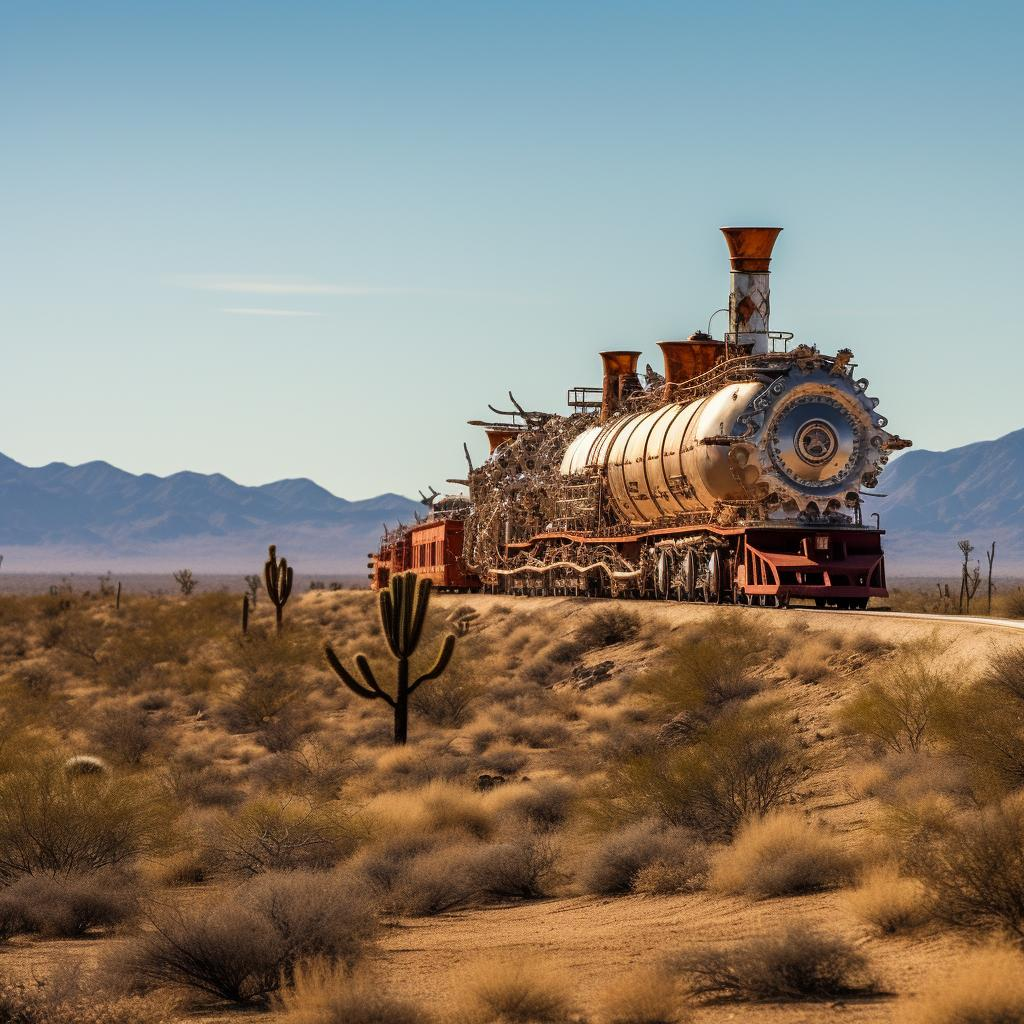

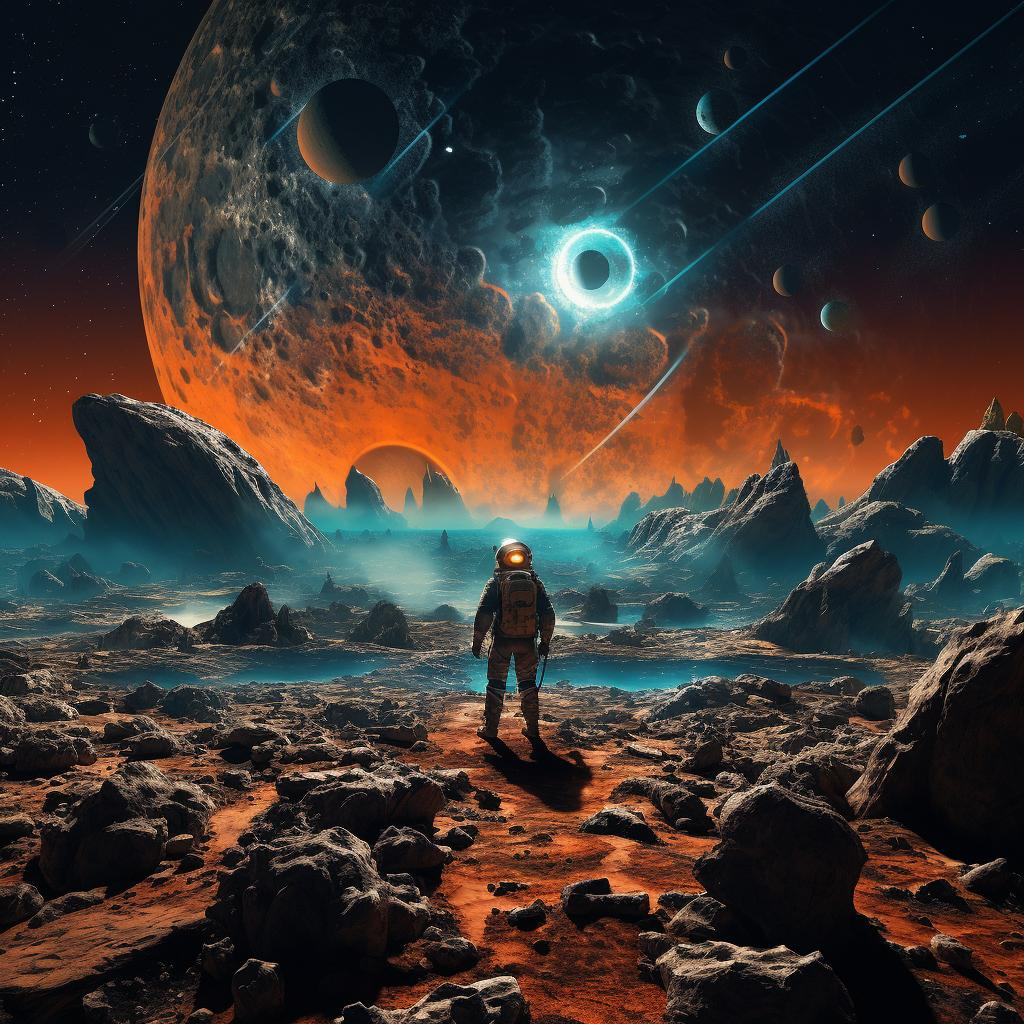

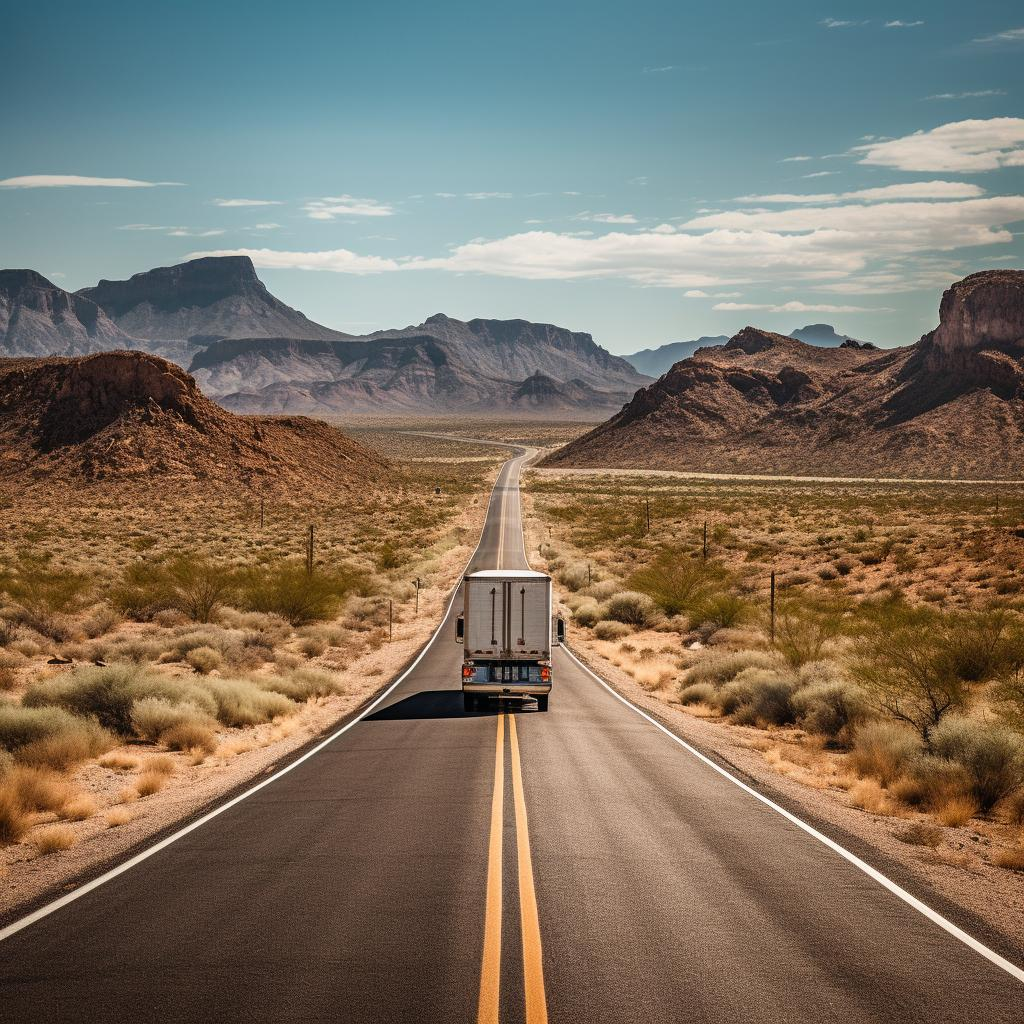

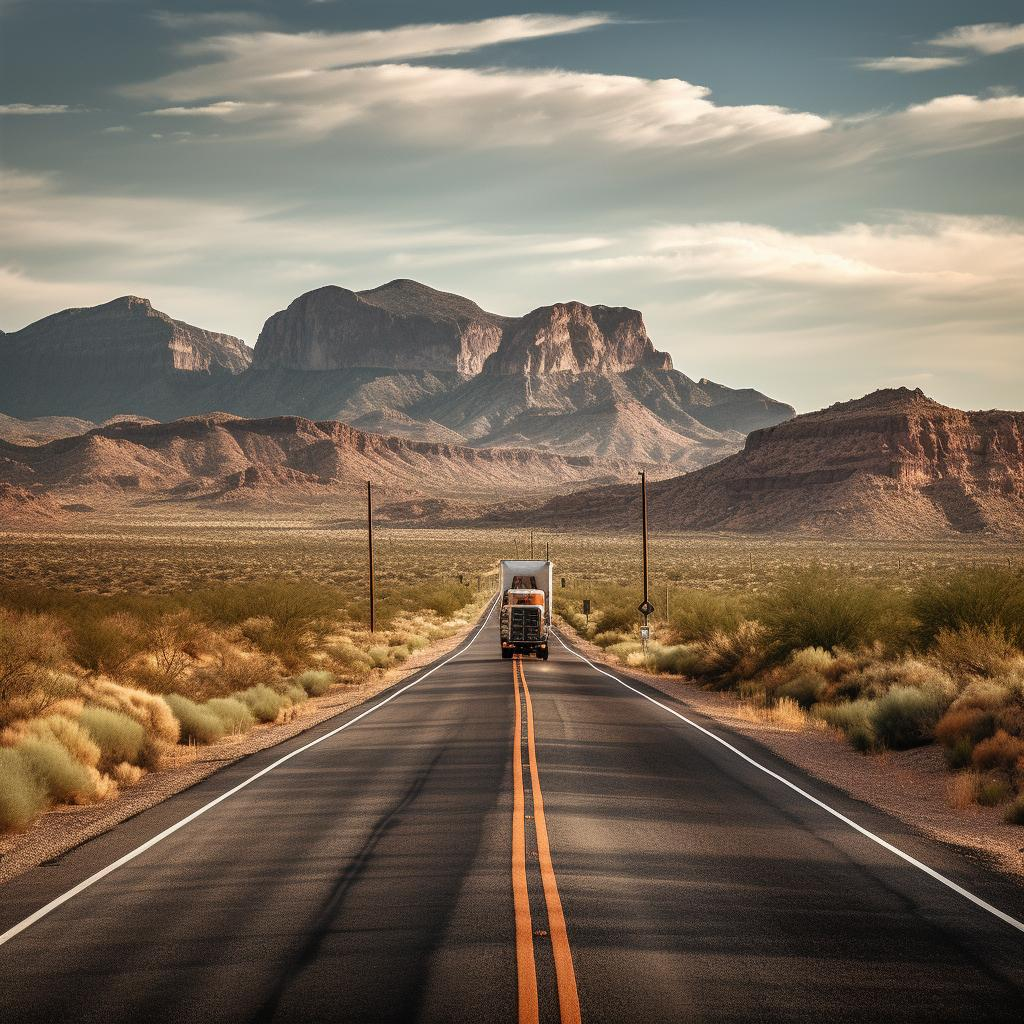

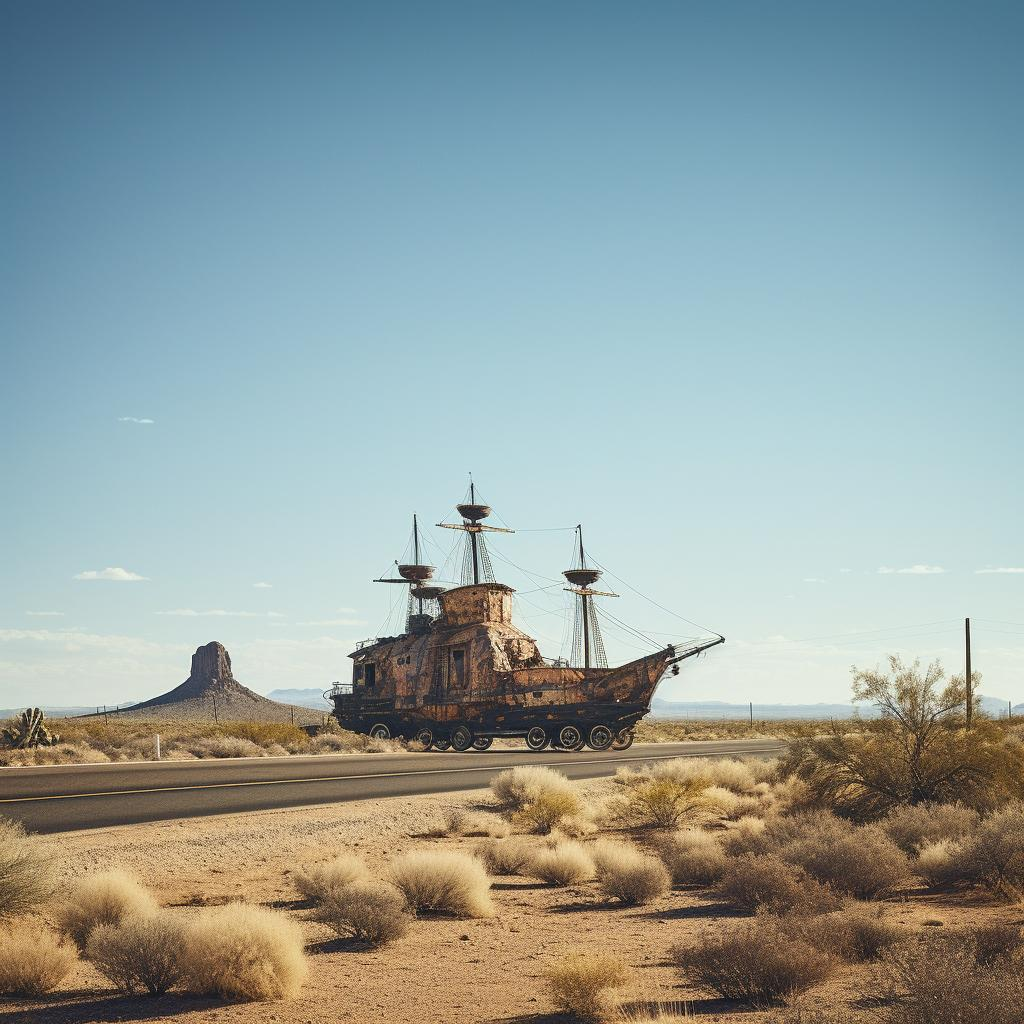

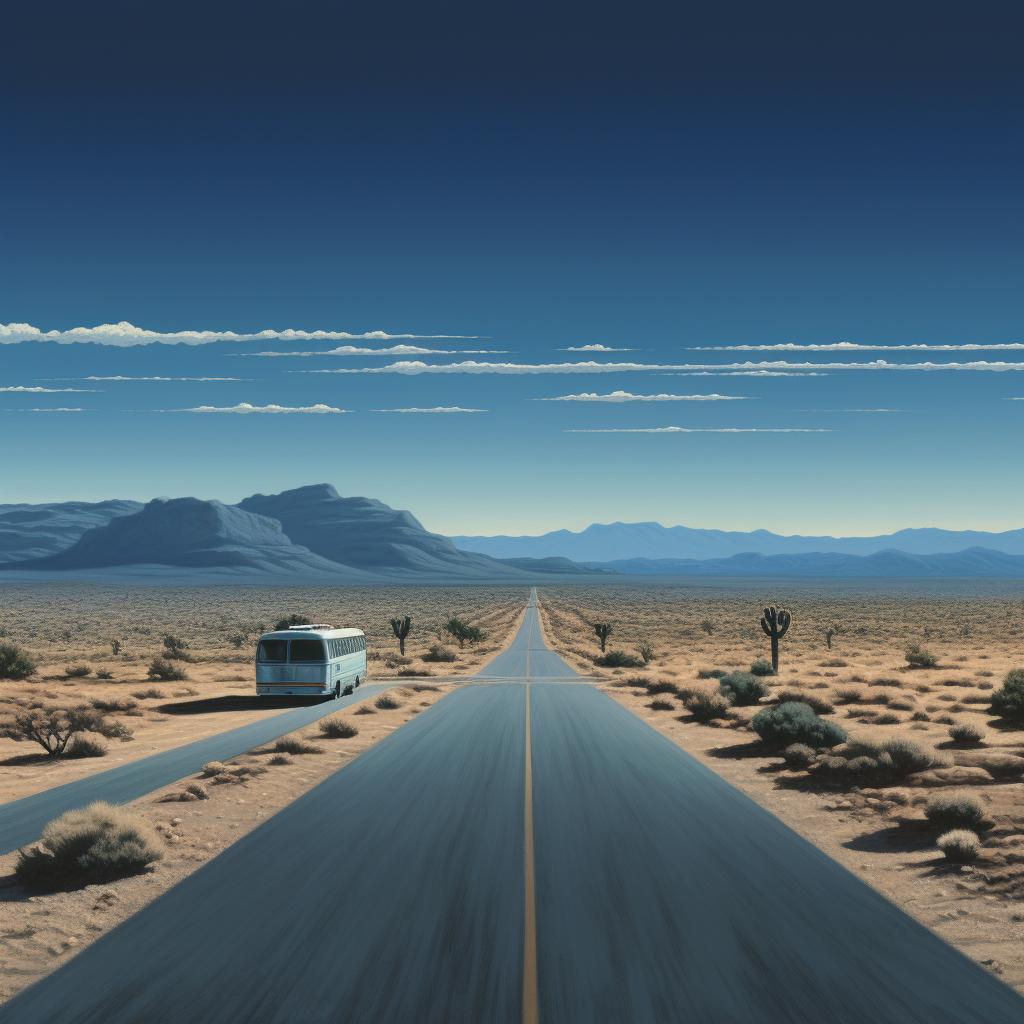

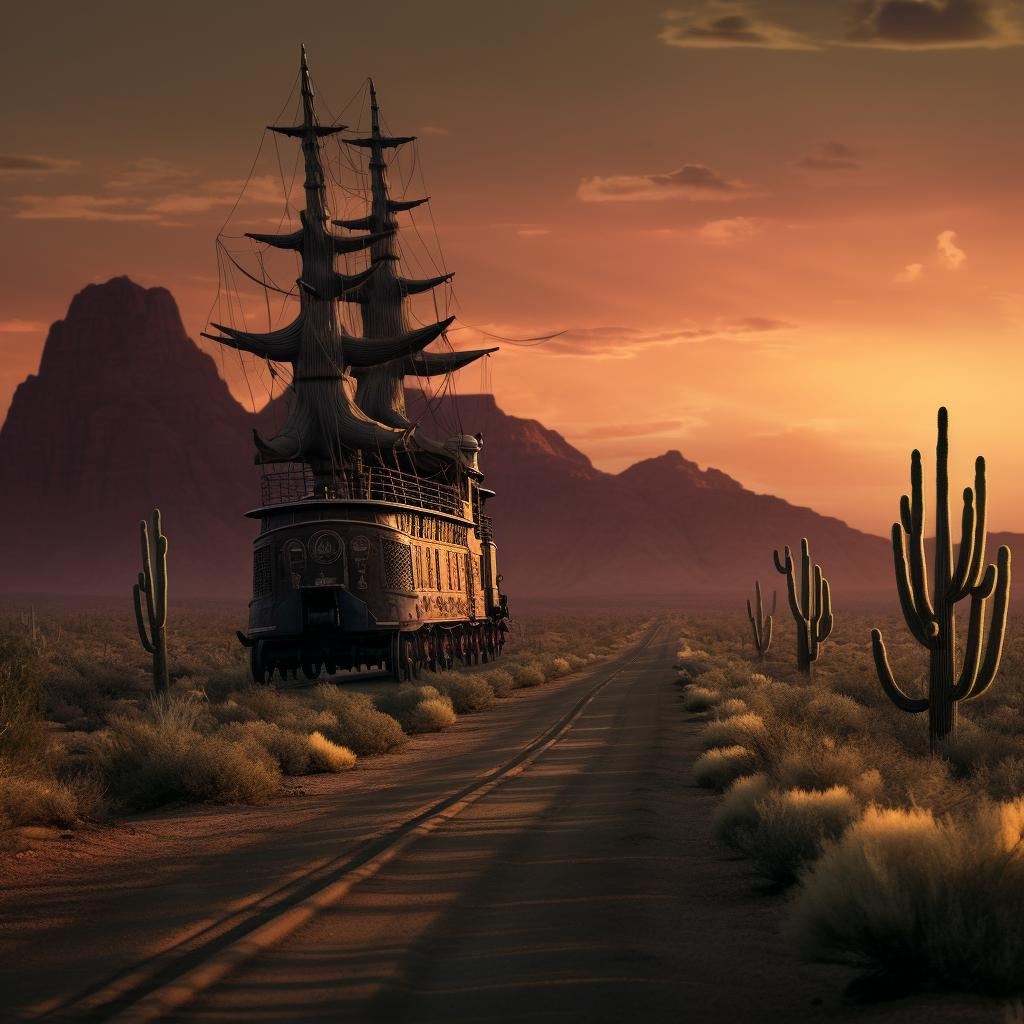

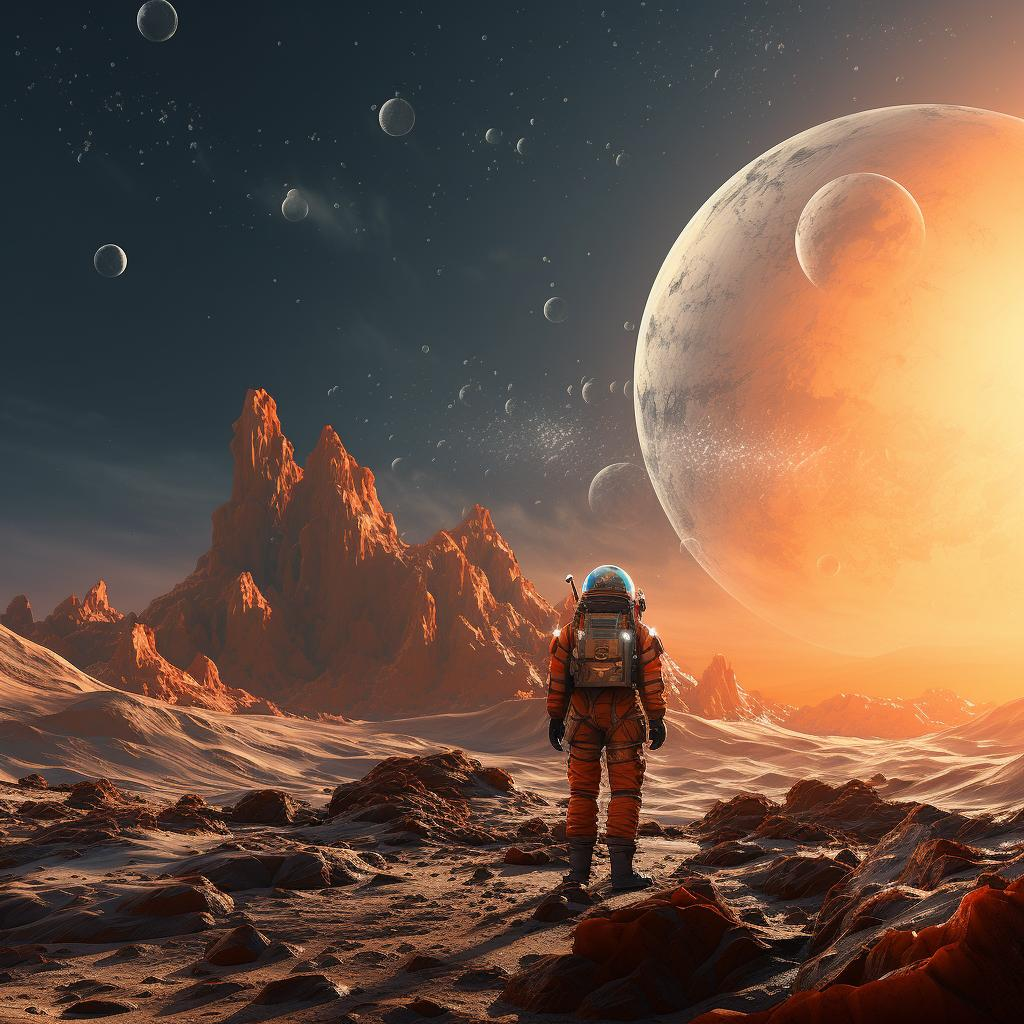

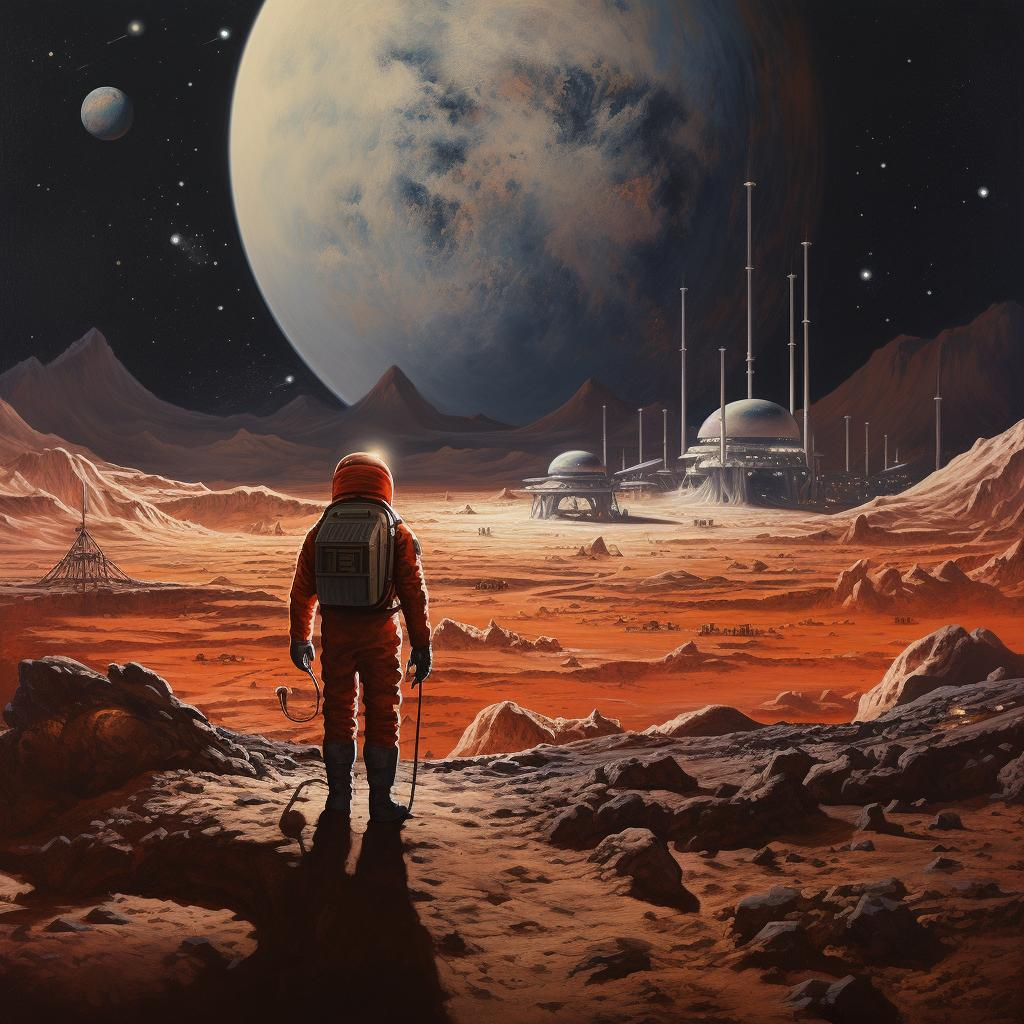

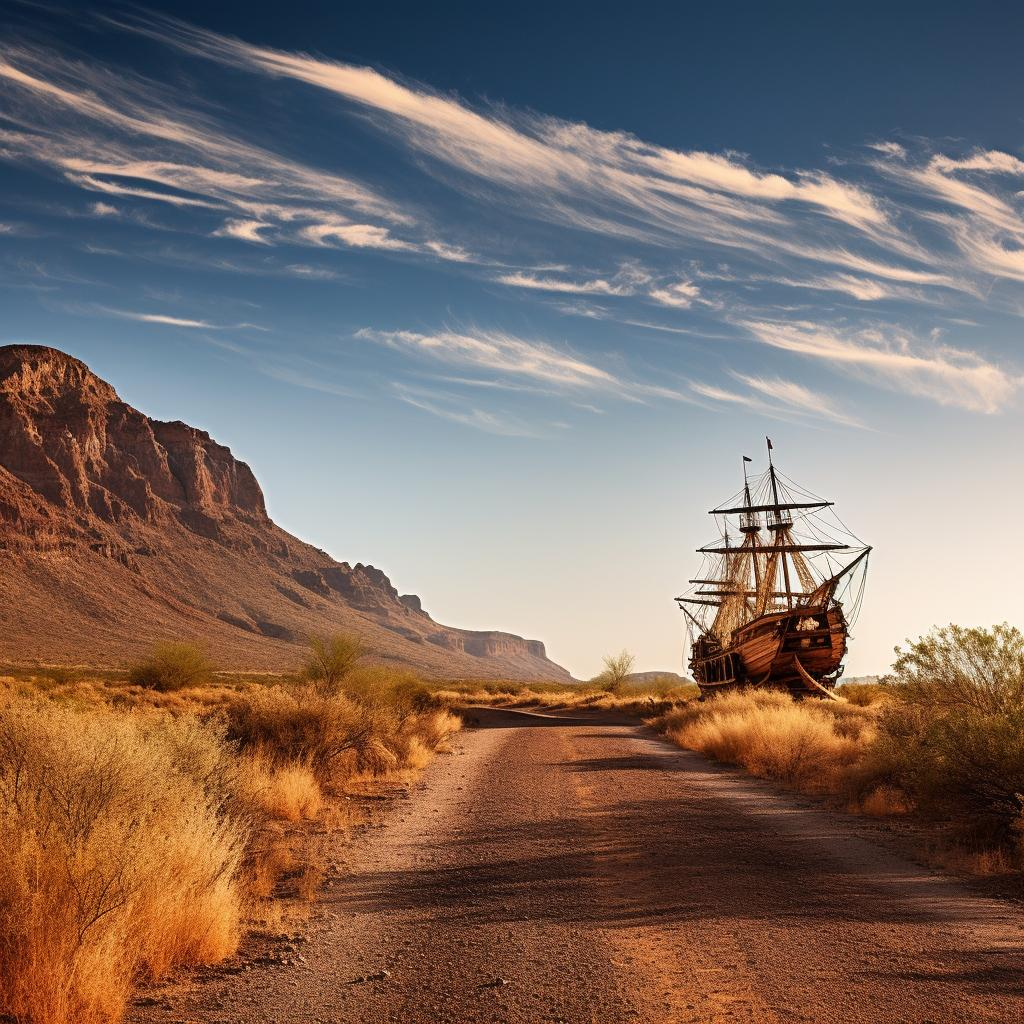

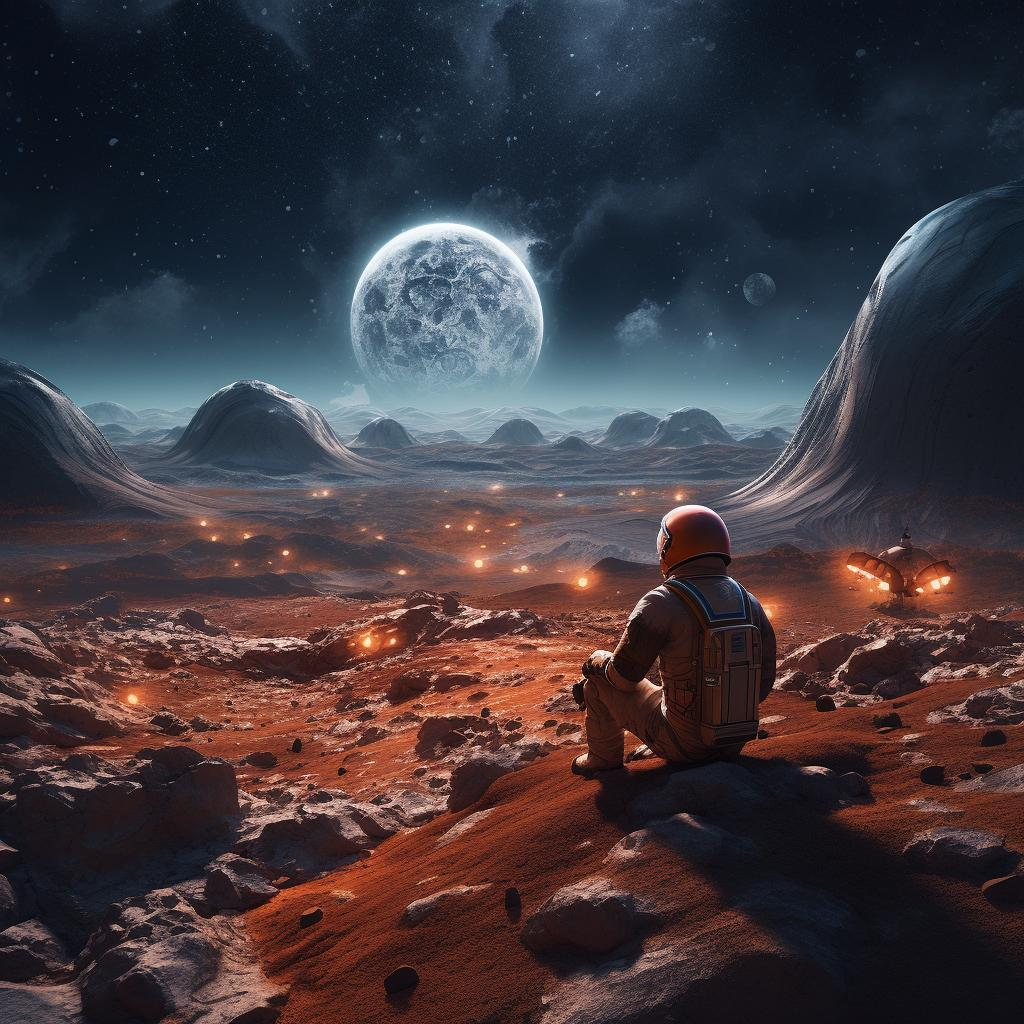

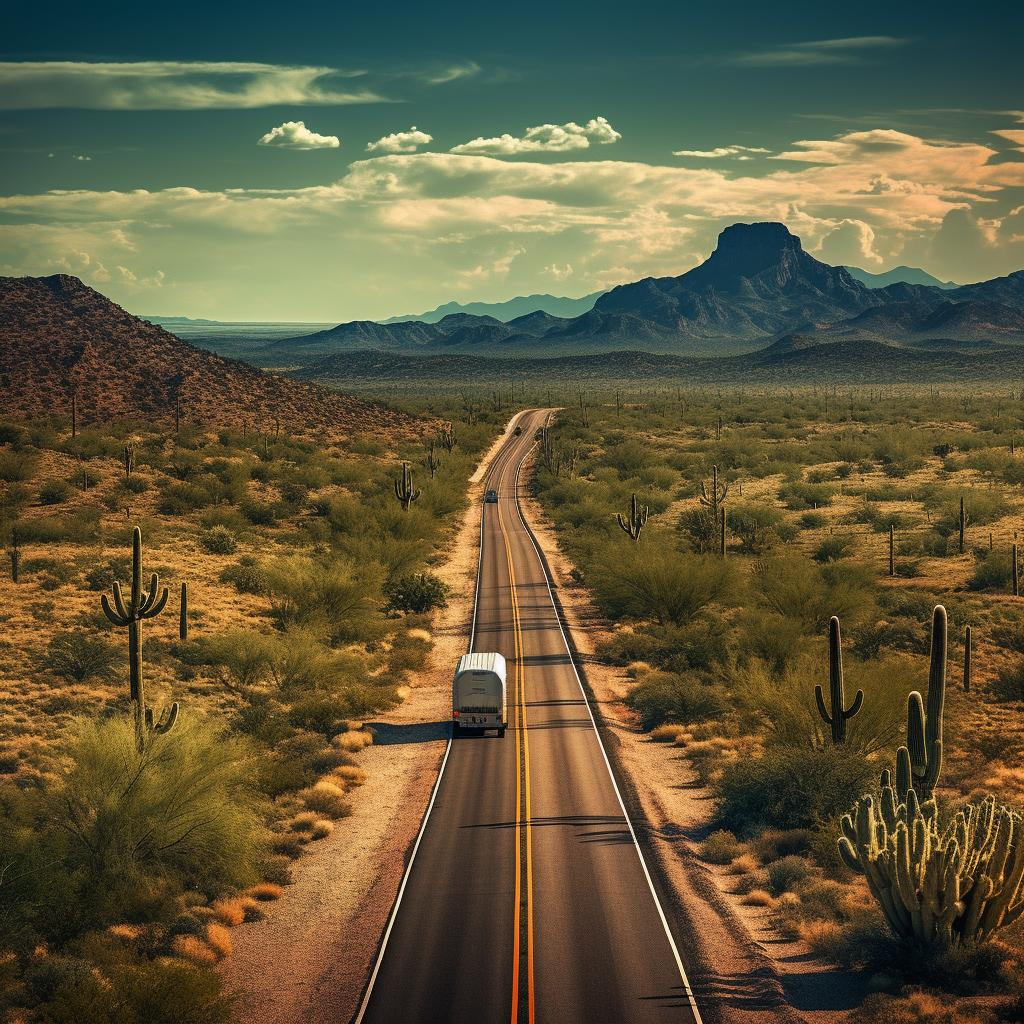

In [ ]:
from IPython.display import Image, display
import os

directory = '/content/output/'

for filename in os.listdir(directory):
    if filename.endswith(".jpg"):
        display(Image(filename=os.path.join(directory, filename)))

In [ ]:
import zipfile
from IPython.display import FileLink

# Zip the images
zip_name = '/content/images.zip'
with zipfile.ZipFile(zip_name, 'w') as zipf:
    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):
            zipf.write(os.path.join(directory, filename), filename)  # Second arg is the arcname, to store the file name without any directory


Example image

In [ ]:
#Development access to delete when going into production Notebook images/19
!curl -H 'Authorization: token {github_token}' -L https://raw.githubusercontent.com/Denis2054/Transformers-for-NLP-and-Computer-Vision-3rd-Edition/main/Notebook%20images/20/image_space.jpg --output "image_space.jpg"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  167k  100  167k    0     0   669k      0 --:--:-- --:--:-- --:--:--  672k


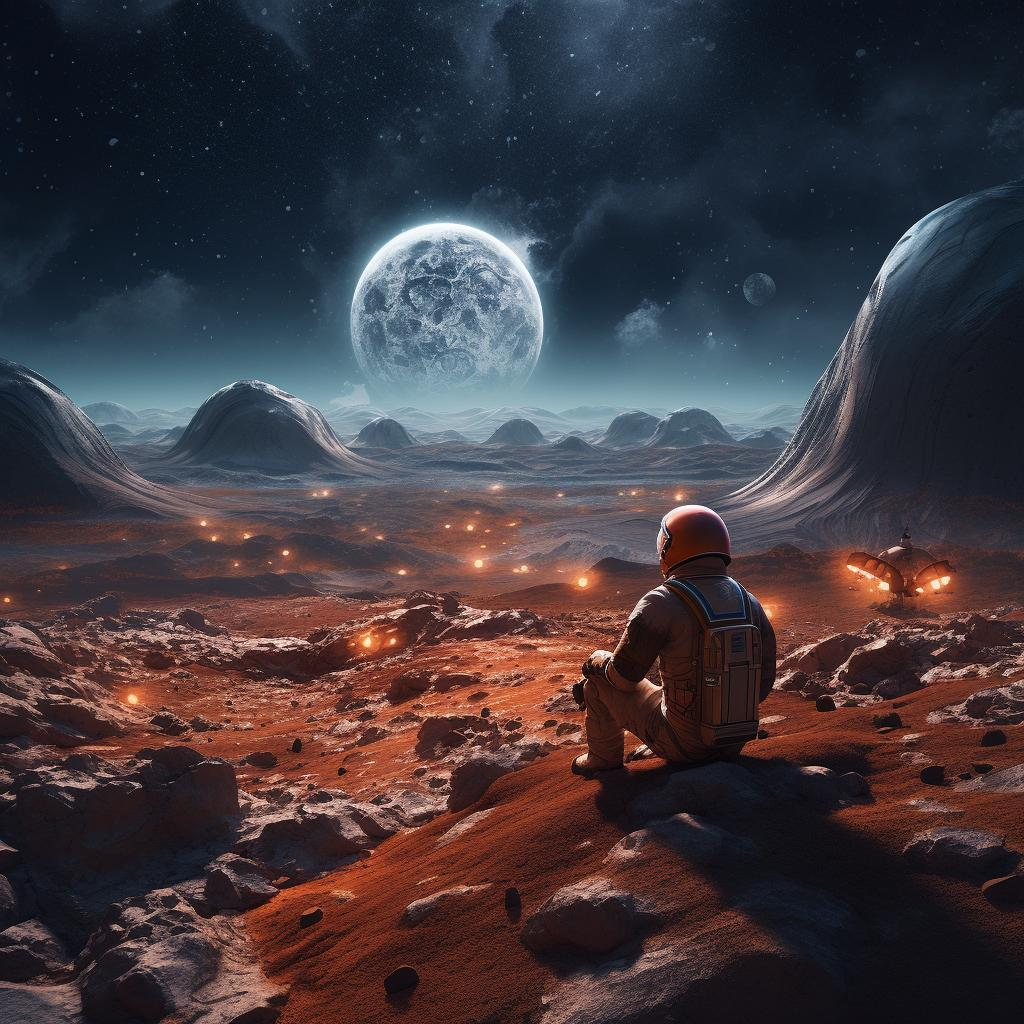

In [ ]:
from IPython.display import Image     #This is used for rendering images in the notebook
from PIL import Image
image_path = "/content/image_space.jpg"
image = Image.open(image_path)
image

# Gallery

Gallery example

In [ ]:
#Development access to delete when going into production Notebook images/19
!curl -H 'Authorization: token {github_token}' -L https://raw.githubusercontent.com/Denis2054/Transformers-for-NLP-and-Computer-Vision-3rd-Edition/main/Notebook%20images/20/gallery.jpg --output "gallery.jpg"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 89786  100 89786    0     0   207k      0 --:--:-- --:--:-- --:--:--  207k


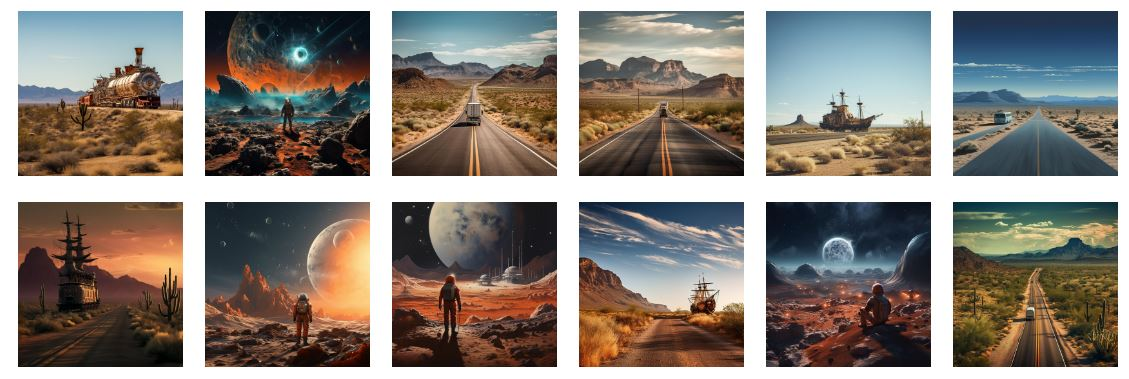

In [ ]:
from IPython.display import Image     #This is used for rendering images in the notebook
from PIL import Image
image_path = "/content/gallery.jpg"
image = Image.open(image_path)
image

Displaying a gallery

In [ ]:
with open('drive/MyDrive/files/github.txt', 'r') as f:
    github_token = f.read().strip()

In [ ]:
#Development access to delete when going into production
!curl -H 'Authorization: token {github_token}' -L https://raw.githubusercontent.com/Denis2054/Transformers_3rd_Edition/master/Chapter20/images.zip --output "images.zip"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1978k  100 1978k    0     0  3696k      0 --:--:-- --:--:-- --:--:-- 3698k


In [ ]:
!unzip images.zip -d images/

Archive:  images.zip
replace images/ai2xai_In_the_distance_a_19th_century_fantastic_ship_glides_smo_b90c0ed5-5cc4-4ae0-882d-48100f6bf639_top_left.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 


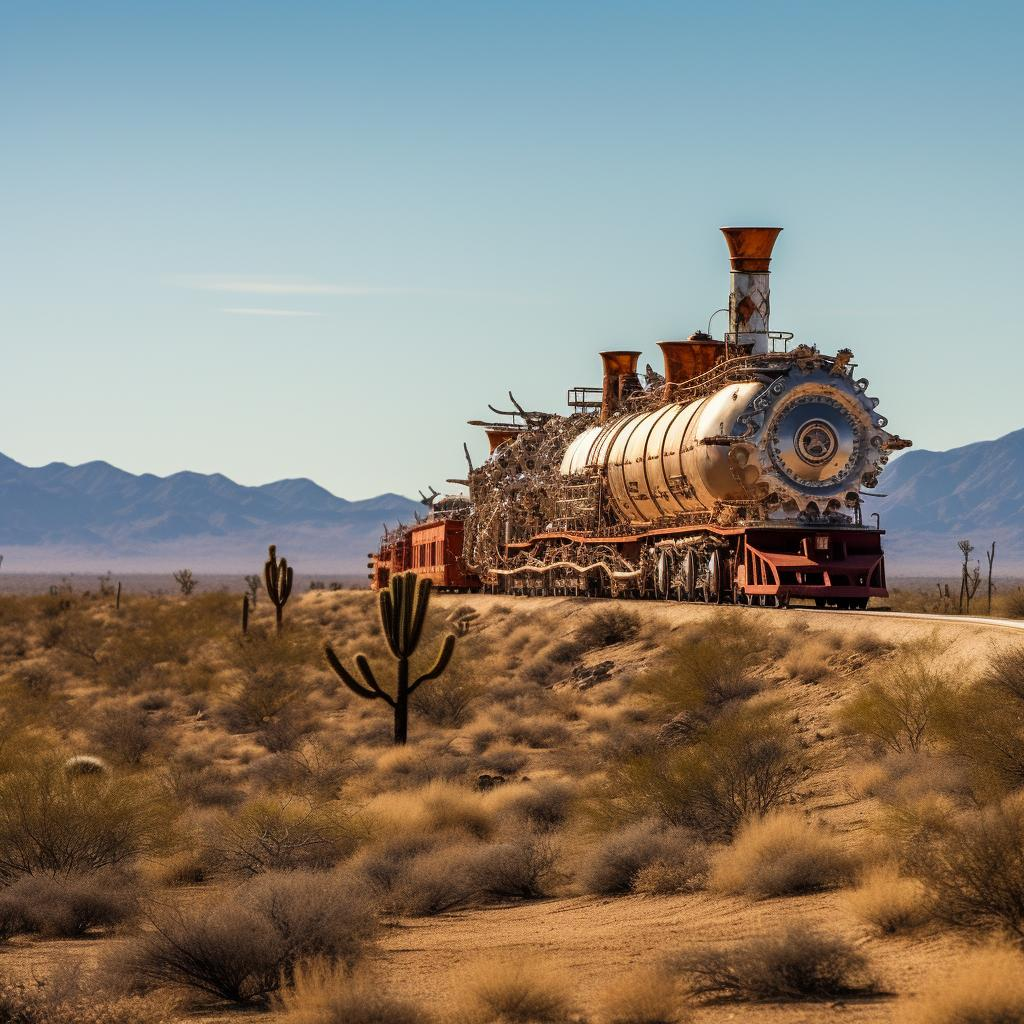
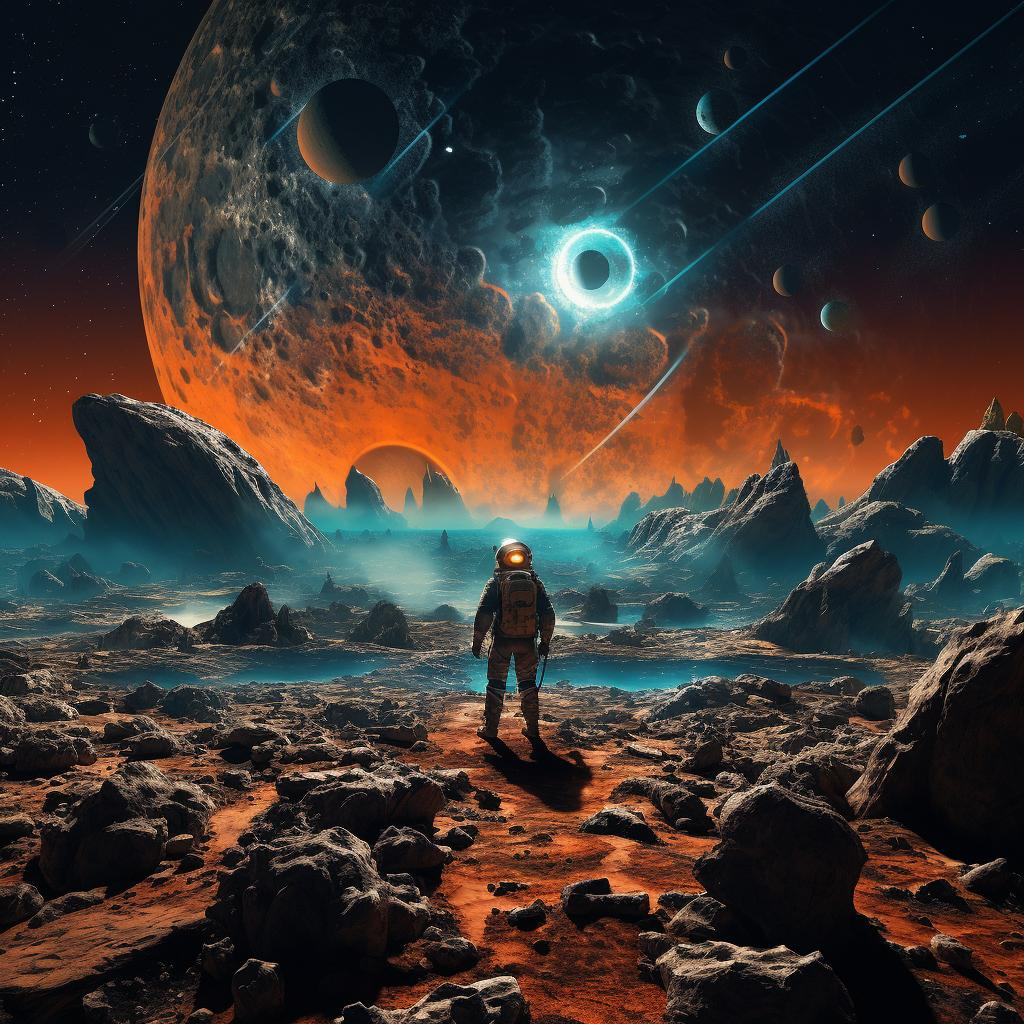
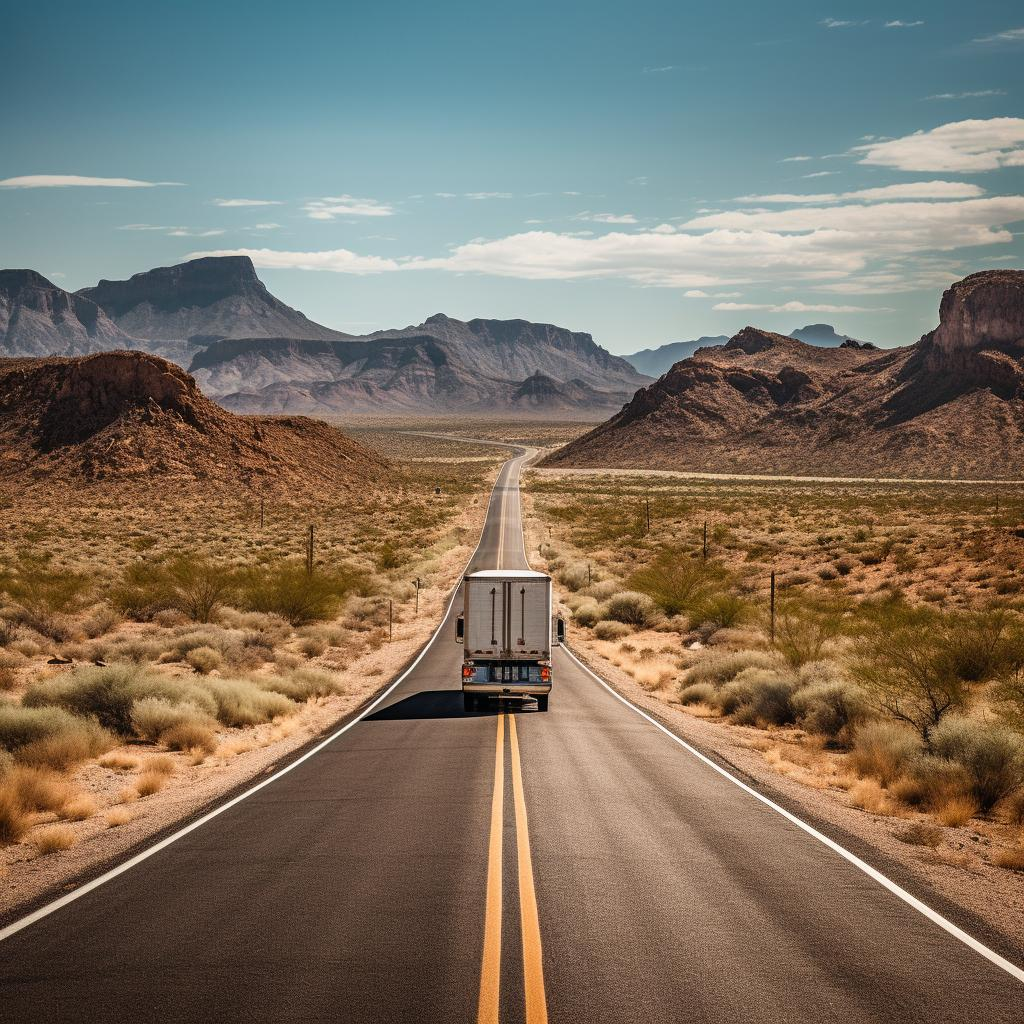
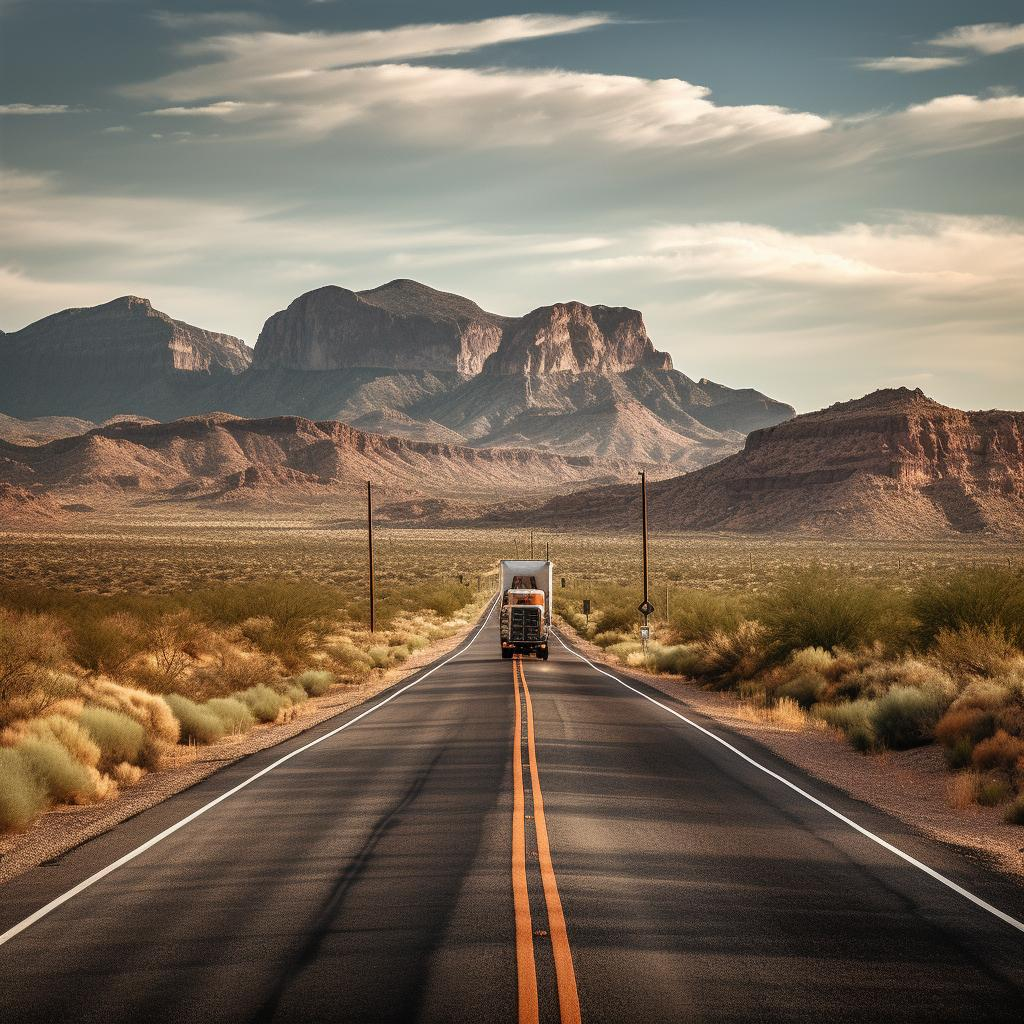
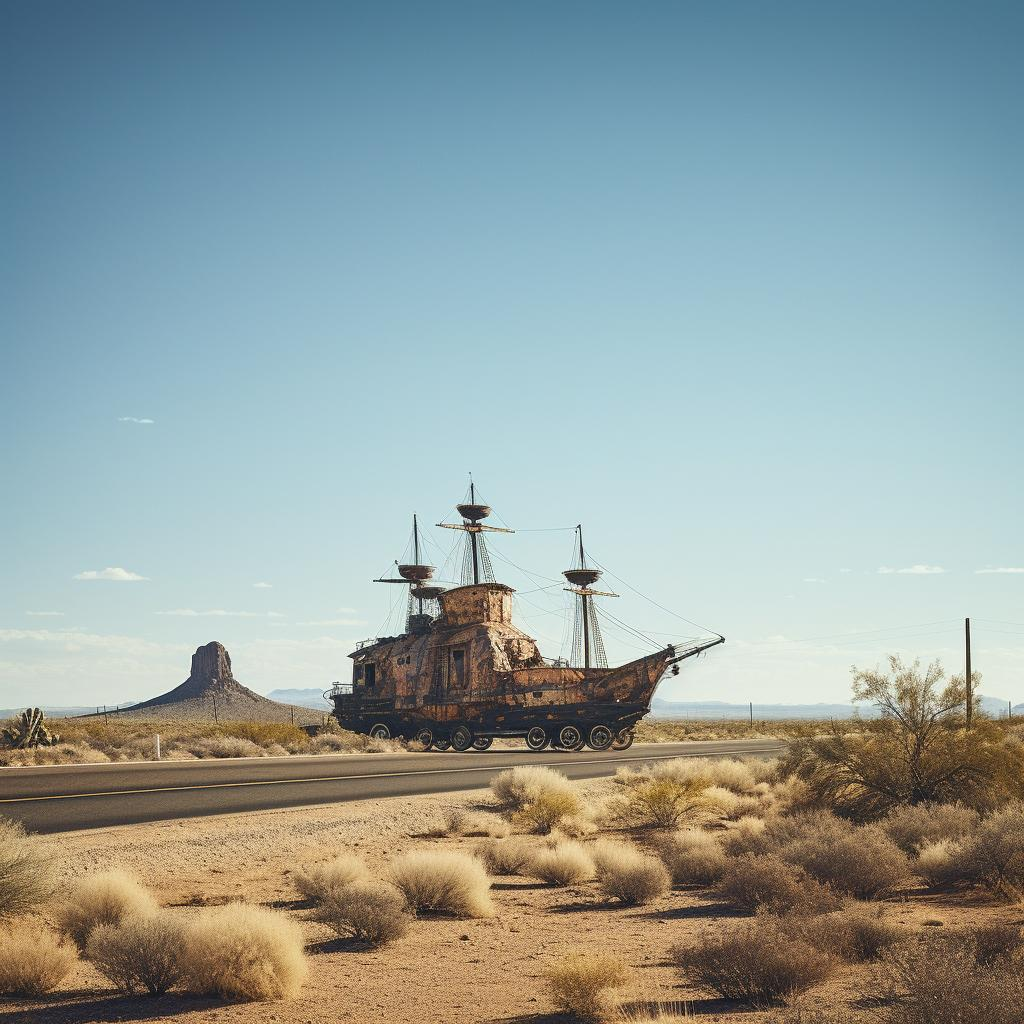
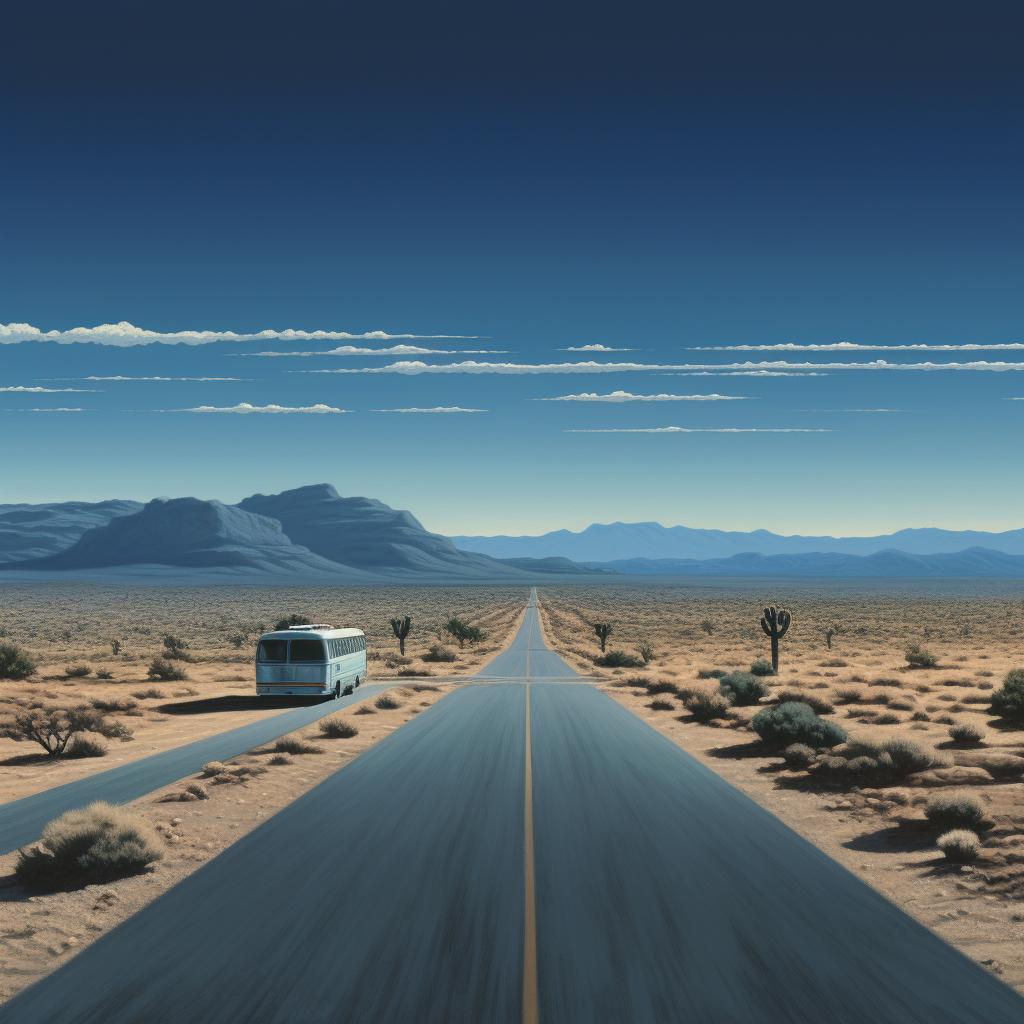
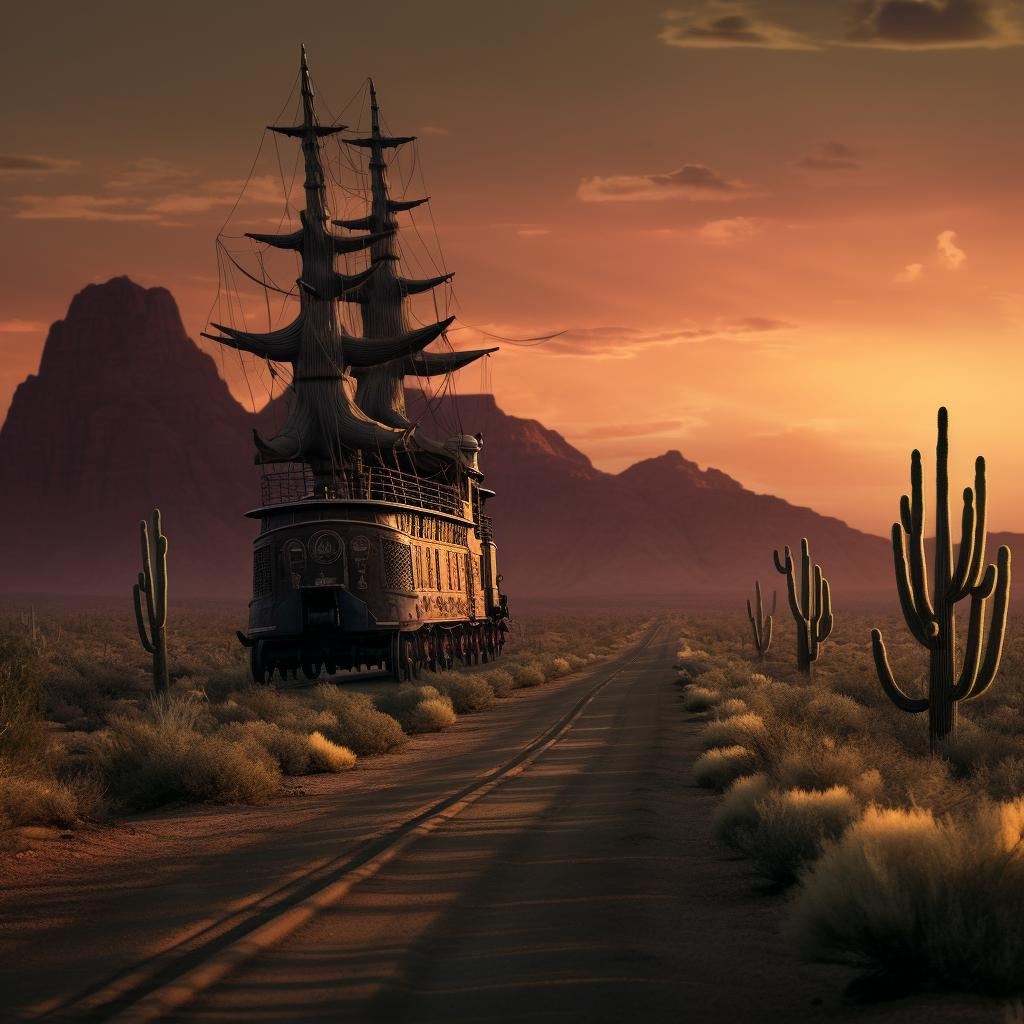
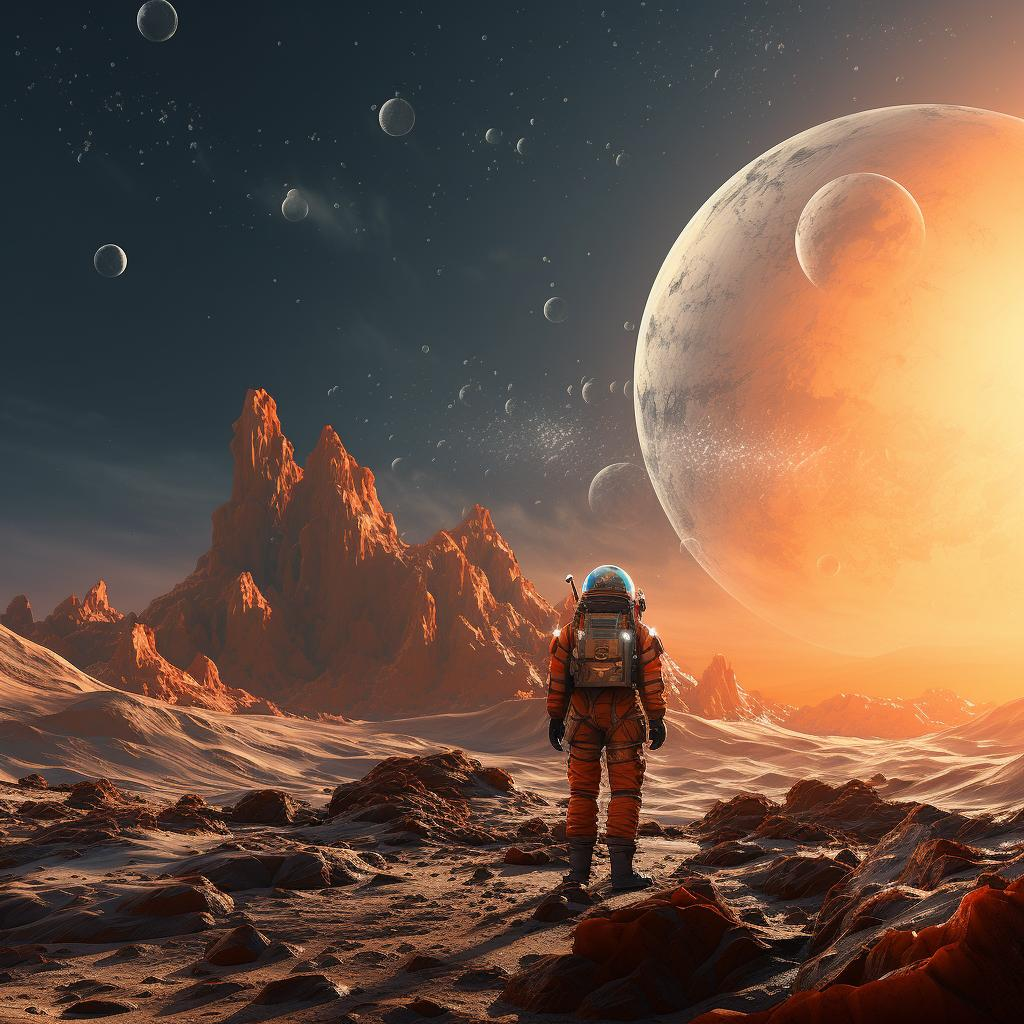
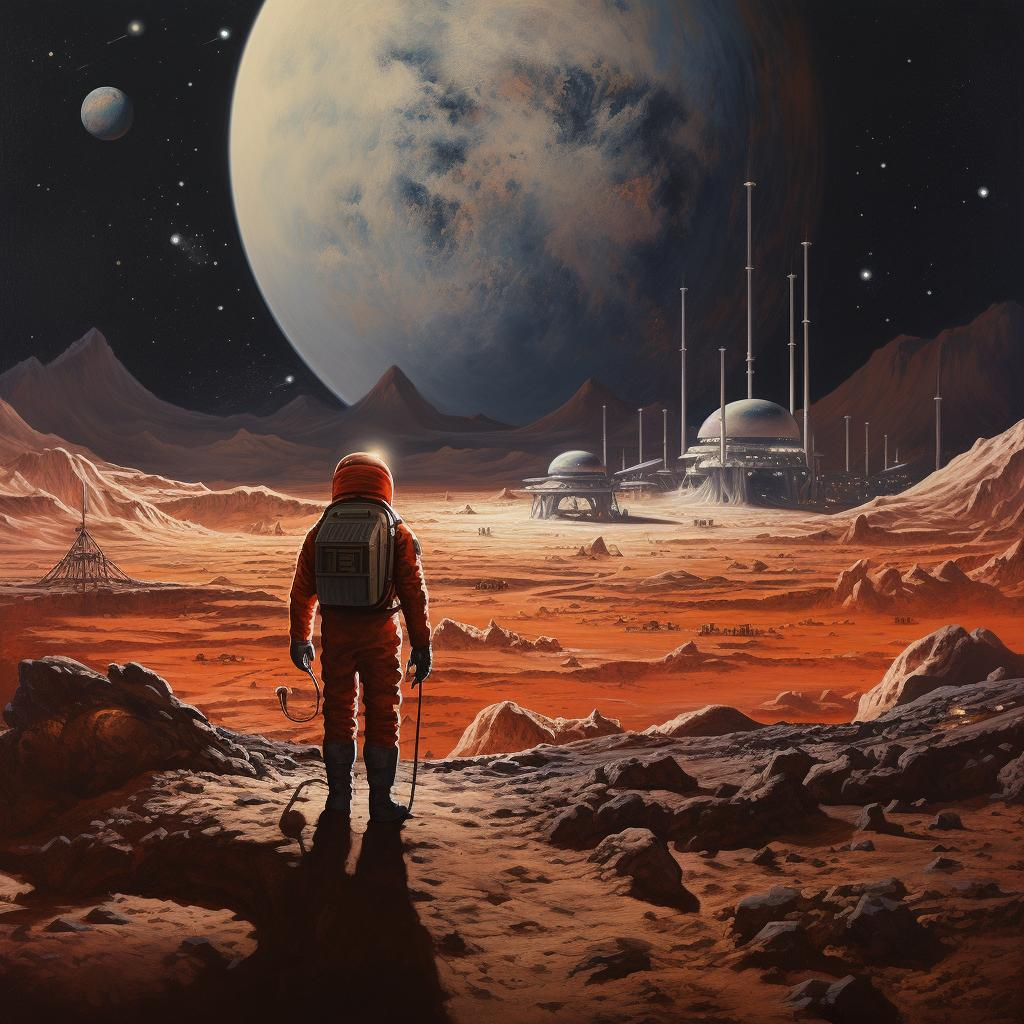
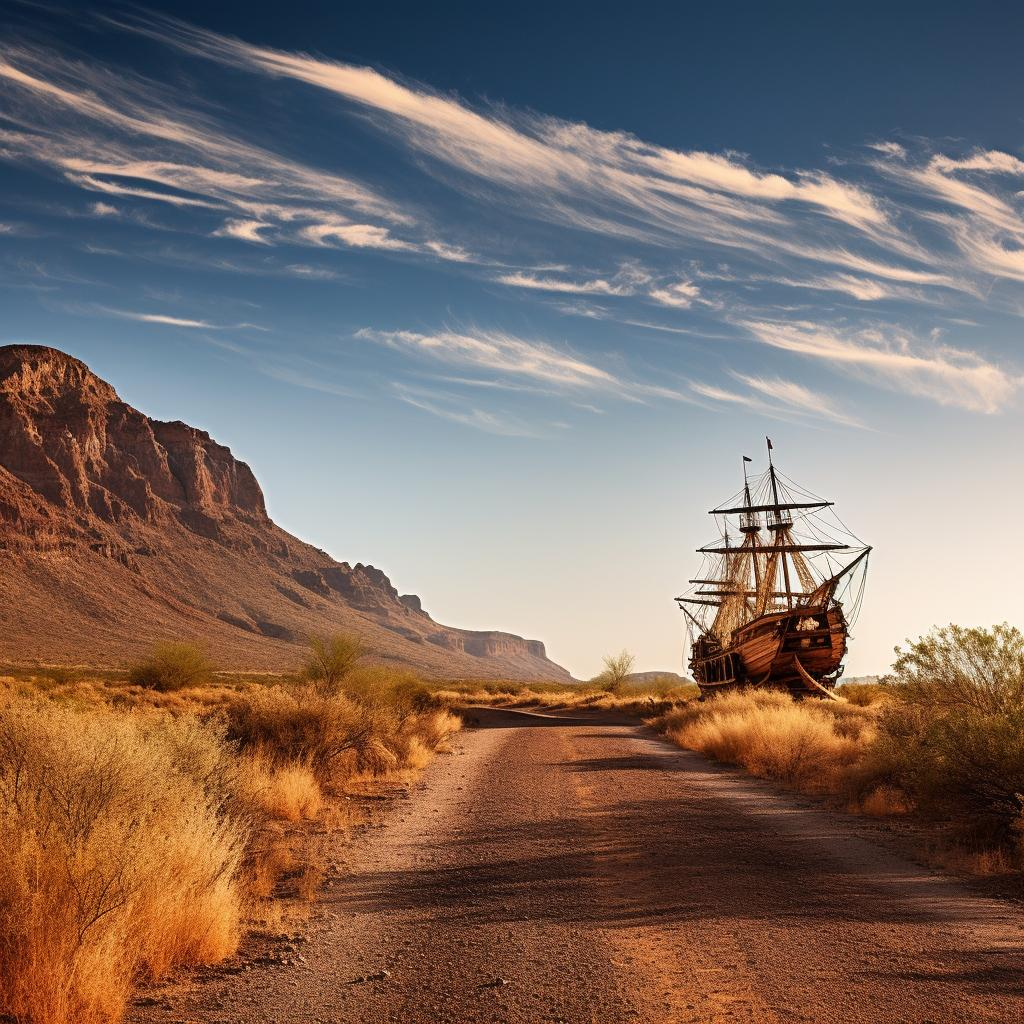
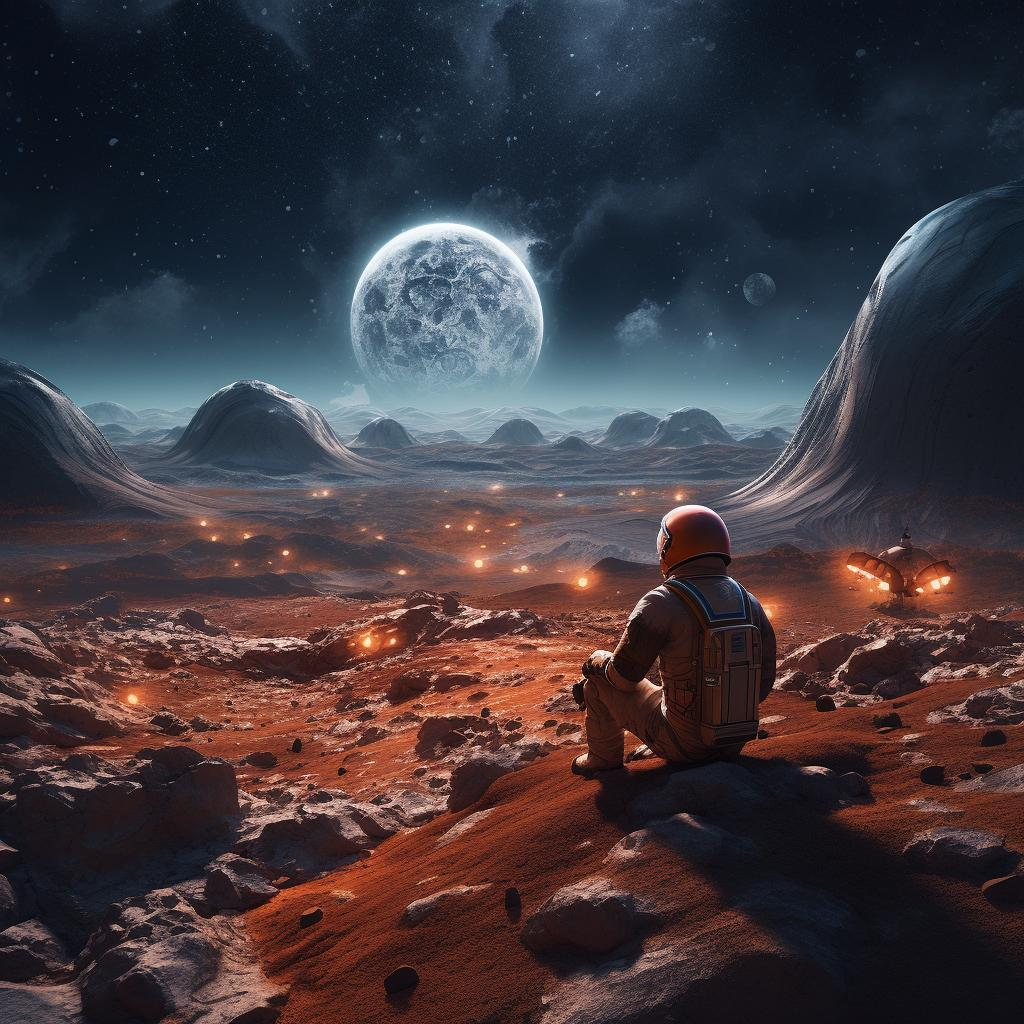
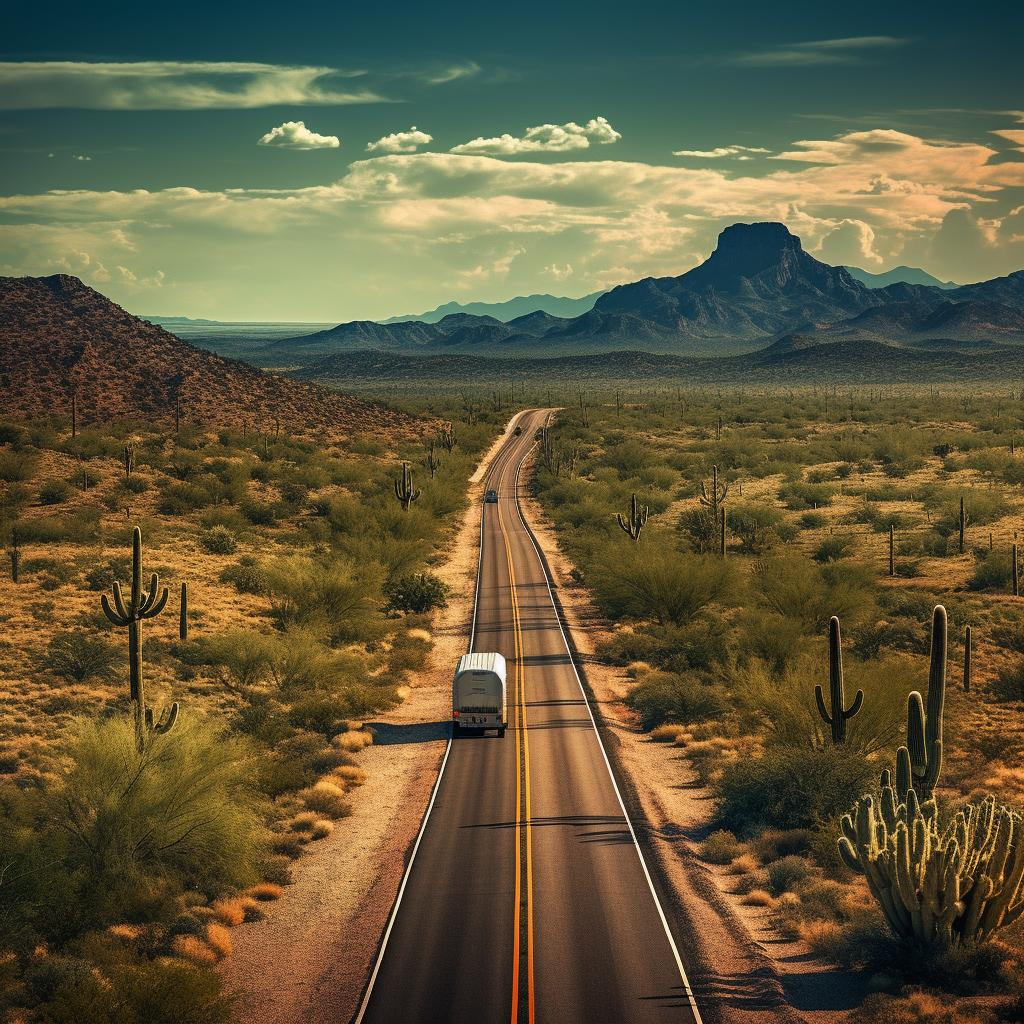

In [ ]:
from IPython.core.display import display, HTML
import os
import base64

# Path to the folder containing the unzipped images
image_folder = '/content/images/'

# List the files in the directory. Ensure they are image files (by checking the extension, for instance)
image_files = [f for f in os.listdir(image_folder) if os.path.isfile(os.path.join(image_folder, f)) and f.endswith('.jpg')]

html_string = '<div style="display: flex; flex-wrap: wrap;">'

for image_file in image_files:
    img_path = os.path.join(image_folder, image_file)

    # Convert image to base64
    with open(img_path, "rb") as image_file_obj:
        encoded_string = base64.b64encode(image_file_obj.read()).decode()

    img_base64 = "data:image/jpeg;base64," + encoded_string

    html_string += f'<div style="margin: 10px;"><img src="{img_base64}" width="150" alt="{image_file}" title="{image_file}"></div>'

html_string += '</div>'

display(HTML(html_string))